In [1]:
import os
import sys
import numpy as np
np.set_printoptions(suppress=True, linewidth=200)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", font_scale=1.13, rc={"lines.linewidth": 3.5})
plt.rcParams['axes.formatter.useoffset'] = True

sys.path.append('./src')
from utils_pde_shock_elasticity import computeElas
colors = ['#1f77b4', '#d62728', 'green']

# Load Results

In [2]:
def return_solution(shock_expo, seed, chiUnderline, a_e, a_h, gamma_e, gamma_h, psi_e, psi_h, delta_e, delta_h, lambda_d, nu,n_layers,units,iter_num, points_size,penalization, action_name):
        
        wMin = 0.01
        wMax = 0.99

        nWealth           = 180
        nZ                = 30
        nV                = 30
        
        wMin_t, wMax_t = [str("{:0.3f}".format(param)).replace('.', '', 1)  for param in [wMin, wMax]]
        domain_folder = 'nW_' + str(nWealth) + '_nZ_' + str(nZ) + '_nV_' + str(nV) + '_wMin_' + wMin_t + '_wMax_' + wMax_t

        parameter_list    = [chiUnderline, a_e, a_h, gamma_e, gamma_h, psi_e, psi_h, delta_e, delta_h, lambda_d, nu]
        chiUnderline, a_e, a_h, gamma_e, gamma_h, psi_e, psi_h, delta_e, delta_h, lambda_d, nu = [str("{:0.3f}".format(param)).replace('.', '', 1)  for param in parameter_list]
        model_folder = 'chiUnderline_' + chiUnderline + '_a_e_' + a_e + '_a_h_' + a_h  + '_gamma_e_' + gamma_e + '_gamma_h_' + gamma_h + '_rho_e_' + psi_e + '_rho_h_' + psi_h + '_delta_e_' + delta_e + '_delta_h_' + delta_h + '_lambda_d_' + lambda_d + '_nu_' + nu
        layer_folder =  'seed_' + str(seed) + '_n_layers_' + str(n_layers) + '_units_' + str(units) +'_points_size_' + str(points_size) + '_iter_num_' + str(iter_num) + '_penalization_' + str(penalization)

        workdir = os.getcwd()
        outputdir = workdir + '/output/' + action_name + '/' + shock_expo + '/'+ domain_folder + '/' + model_folder + '/' + layer_folder + '/'
        print(outputdir)

        eva_V_10 = np.load(outputdir + 'eva_V_10.npz')
        eva_V_50 = np.load(outputdir + 'eva_V_50.npz')
        eva_V_90 = np.load(outputdir + 'eva_V_90.npz')

        print('HJBE_validation_MSE: ', np.load(outputdir + 'HJBE_validation_MSE.npy'))
        print('HJBH_validation_MSE: ', np.load(outputdir + 'HJBH_validation_MSE.npy'))
        print('kappa_validation_MSE: ', np.load(outputdir + 'kappa_validation_MSE.npy'))

        try:
                elasticity_logw = np.load(outputdir + 'elasticity_logw.npz', allow_pickle=True)
        except:
            elasticity_logw = None
        try:
            uncertaintye_priceelas = np.load(outputdir + 'uncertaintye_priceelas.npz', allow_pickle=True)
        except:
                uncertaintye_priceelas = None
        try:
            uncertaintyh_priceelas = np.load(outputdir + 'uncertaintyh_priceelas.npz', allow_pickle=True)
        except:
                uncertaintyh_priceelas = None

        W = np.load(outputdir + 'W_NN.npy')
        W = pd.DataFrame(W, columns = ['W'])
        Z = np.load(outputdir + 'Z_NN.npy')
        Z = pd.DataFrame(Z, columns = ['Z'])
        V = np.load(outputdir + 'V_NN.npy')
        V = pd.DataFrame(V, columns = ['V'])

        dent = np.load(outputdir + 'dent_NN.npy')
        dent = pd.DataFrame(dent, columns = ['dent'])
        dent = pd.concat([W,Z,V,dent['dent']], axis=1)
        dentW = dent.groupby('W').sum()['dent']
        dentV = dent.groupby('V').sum()['dent']

        try:
                elasticities_W_percentile_005 = np.load(outputdir + 'elasticities_W_percentile_0.05.npz', allow_pickle=True)
        except:
                elasticities_W_percentile_005 = None
        try:
                elasticities_W_percentile_01 = np.load(outputdir + 'elasticities_W_percentile_0.1.npz', allow_pickle=True)
        except:
                elasticities_W_percentile_01 = None
        try:
                elasticities_W_percentile_05 = np.load(outputdir + 'elasticities_W_percentile_0.5.npz', allow_pickle=True)
        except:
                elasticities_W_percentile_05 = None

        return {'eva_V_10':eva_V_10, 'eva_V_50':eva_V_50, 'eva_V_90':eva_V_90, 'dentW':dentW, 'dentV':dentV,
                'W':W, 'Z':Z, 'V':V, 'elasticity_logw':elasticity_logw,  'uncertaintye_priceelas':uncertaintye_priceelas, 'uncertaintyh_priceelas':uncertaintyh_priceelas,\
                'elasticities_W_percentile_005':elasticities_W_percentile_005, 'elasticities_W_percentile_01':elasticities_W_percentile_01, 'elasticities_W_percentile_05':elasticities_W_percentile_05}


In [3]:
modelRF_lower = return_solution(shock_expo = 'lower_triangular', seed = 256, chiUnderline = 1.0, a_e = 0.0922, a_h = 0.0, gamma_e = 4.0, gamma_h = 8.0, psi_e = 1.0, psi_h = 1.0, delta_e = 0.0115, delta_h = 0.01, lambda_d = 0.0, nu = 0.1, n_layers = 2, units = 16, iter_num = 5, points_size = 10, penalization = 10000, action_name = 'neural_net')
modelRF_upper = return_solution(shock_expo = 'upper_triangular', seed = 256, chiUnderline = 1.0, a_e = 0.0922, a_h = 0.0, gamma_e = 4.0, gamma_h = 8.0, psi_e = 1.0, psi_h = 1.0, delta_e = 0.0115, delta_h = 0.01, lambda_d = 0.0, nu = 0.1, n_layers = 2, units = 16, iter_num = 5, points_size = 10, penalization = 10000, action_name = 'neural_net')
modelSG_lower = return_solution(shock_expo = 'lower_triangular', seed = 256, chiUnderline = 0.2, a_e = 0.0922, a_h = 0.0, gamma_e = 4.0, gamma_h = 8.0, psi_e = 1.0, psi_h = 1.0, delta_e = 0.0115, delta_h = 0.01, lambda_d = 0.0, nu = 0.1, n_layers = 2, units = 16, iter_num = 5, points_size = 10, penalization = 10000, action_name = 'neural_net')
modelSG_upper = return_solution(shock_expo = 'upper_triangular', seed = 256, chiUnderline = 1.0, a_e = 0.0922, a_h = 0.0, gamma_e = 4.0, gamma_h = 8.0, psi_e = 1.0, psi_h = 1.0, delta_e = 0.0115, delta_h = 0.01, lambda_d = 0.0, nu = 0.1, n_layers = 2, units = 16, iter_num = 5, points_size = 10, penalization = 10000, action_name = 'neural_net')
modelPR_lower = return_solution(shock_expo = 'lower_triangular', seed = 256, chiUnderline = 0.00001, a_e = 0.0922, a_h = 0.0, gamma_e = 4.0, gamma_h = 8.0, psi_e = 1.0, psi_h = 1.0, delta_e = 0.0115, delta_h = 0.01, lambda_d = 0.0, nu = 0.1, n_layers = 2, units = 16, iter_num = 5, points_size = 10, penalization = 10000, action_name = 'neural_net')
modelPR_upper = return_solution(shock_expo = 'upper_triangular', seed = 256, chiUnderline = 0.00001, a_e = 0.0922, a_h = 0.0, gamma_e = 4.0, gamma_h = 8.0, psi_e = 1.0, psi_h = 1.0, delta_e = 0.0115, delta_h = 0.01, lambda_d = 0.0, nu = 0.1, n_layers = 2, units = 16, iter_num = 5, points_size = 10, penalization = 10000, action_name = 'neural_net')

modelRF_lower_gammae_3 = return_solution(shock_expo = 'lower_triangular',seed = 256, chiUnderline = 1.0, a_e = 0.0922, a_h = 0.0, gamma_e = 3.0, gamma_h = 8.0, psi_e = 1.0, psi_h = 1.0, delta_e = 0.0115, delta_h = 0.01, lambda_d = 0.0, nu = 0.1, n_layers = 2, units = 16, iter_num = 5, points_size = 10, penalization = 10000, action_name = 'neural_net')
modelRF_lower_gammae_5 = return_solution(shock_expo = 'lower_triangular',seed = 256, chiUnderline = 1.0, a_e = 0.0922, a_h = 0.0, gamma_e = 5.0, gamma_h = 8.0, psi_e = 1.0, psi_h = 1.0, delta_e = 0.0115, delta_h = 0.01, lambda_d = 0.0, nu = 0.1, n_layers = 2, units = 16, iter_num = 5, points_size = 10, penalization = 10000, action_name = 'neural_net')

modelSG_lower_gammae_3 = return_solution(shock_expo = 'lower_triangular',seed = 256, chiUnderline = 0.2, a_e = 0.0922, a_h = 0.0, gamma_e = 3.0, gamma_h = 8.0, psi_e = 1.0, psi_h = 1.0, delta_e = 0.0115, delta_h = 0.01, lambda_d = 0.0, nu = 0.1, n_layers = 2, units = 16, iter_num = 5, points_size = 10, penalization = 10000, action_name = 'neural_net')
modelSG_lower_gammae_5 = return_solution(shock_expo = 'lower_triangular',seed = 256, chiUnderline = 0.2, a_e = 0.0922, a_h = 0.0, gamma_e = 5.0, gamma_h = 8.0, psi_e = 1.0, psi_h = 1.0, delta_e = 0.0115, delta_h = 0.01, lambda_d = 0.0, nu = 0.1, n_layers = 2, units = 16, iter_num = 5, points_size = 10, penalization = 10000, action_name = 'neural_net')

modelPR_lower_gammae_3 = return_solution(shock_expo = 'lower_triangular',seed = 256, chiUnderline = 0.00001, a_e = 0.0922, a_h = 0.0, gamma_e = 3.0, gamma_h = 8.0, psi_e = 1.0, psi_h = 1.0, delta_e = 0.0115, delta_h = 0.01, lambda_d = 0.0, nu = 0.1, n_layers = 2, units = 16, iter_num = 5, points_size = 10, penalization = 10000, action_name = 'neural_net')
modelPR_lower_gammae_5 = return_solution(shock_expo = 'lower_triangular',seed = 256, chiUnderline = 0.00001, a_e = 0.0922, a_h = 0.0, gamma_e = 5.0, gamma_h = 8.0, psi_e = 1.0, psi_h = 1.0, delta_e = 0.0115, delta_h = 0.01, lambda_d = 0.0, nu = 0.1, n_layers = 2, units = 16, iter_num = 5, points_size = 10, penalization = 10000, action_name = 'neural_net')


/project/lhansen/macrofinance/heterogenous_agents_with_frictions_NN/output/neural_net/lower_triangular/nW_180_nZ_30_nV_30_wMin_0010_wMax_0990/chiUnderline_1000_a_e_0092_a_h_0000_gamma_e_4000_gamma_h_8000_rho_e_1000_rho_h_1000_delta_e_0011_delta_h_0010_lambda_d_0000_nu_0100/seed_256_n_layers_2_units_16_points_size_10_iter_num_5_penalization_10000/
HJBE_validation_MSE:  2.8413337653444003e-05
HJBH_validation_MSE:  2.0985705160093152e-05
kappa_validation_MSE:  8.453717859970984e-13
/project/lhansen/macrofinance/heterogenous_agents_with_frictions_NN/output/neural_net/upper_triangular/nW_180_nZ_30_nV_30_wMin_0010_wMax_0990/chiUnderline_1000_a_e_0092_a_h_0000_gamma_e_4000_gamma_h_8000_rho_e_1000_rho_h_1000_delta_e_0011_delta_h_0010_lambda_d_0000_nu_0100/seed_256_n_layers_2_units_16_points_size_10_iter_num_5_penalization_10000/
HJBE_validation_MSE:  2.442589871103974e-05
HJBH_validation_MSE:  2.0688856497623123e-05
kappa_validation_MSE:  8.935164172208854e-13
/project/lhansen/macrofinance/het

# Experts Wealth Share Exposure Elasticity and Price Elasticity

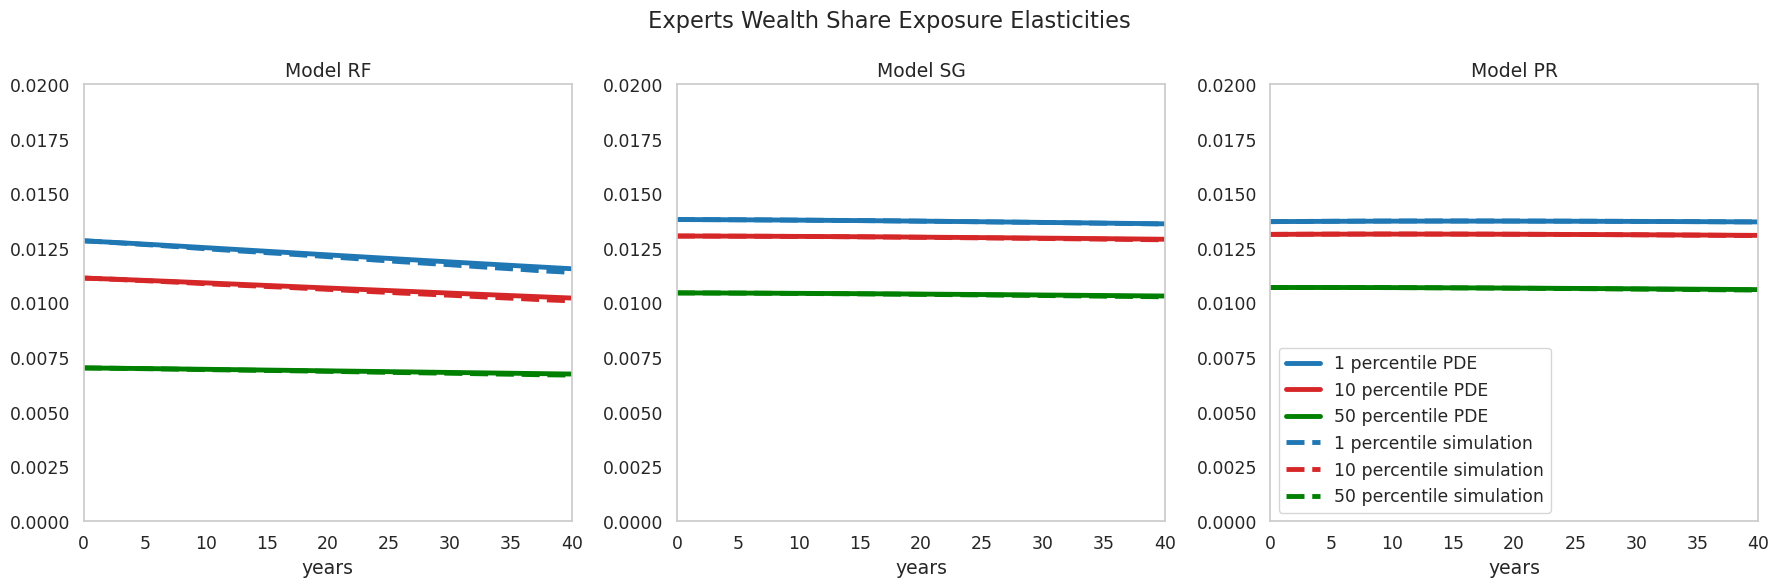

In [4]:
fig, axes = plt.subplots(1,3, figsize=(18, 6))
sns.lineplot(modelRF_lower['elasticity_logw']['exposure_elasticity'].item().firstType[0,0,:], ax = axes[0], color = colors[0])
sns.lineplot(modelRF_lower['elasticity_logw']['exposure_elasticity'].item().firstType[1,0,:], ax = axes[0], color = colors[1])
sns.lineplot(modelRF_lower['elasticity_logw']['exposure_elasticity'].item().firstType[2,0,:], ax = axes[0], color = colors[2])

sns.lineplot(modelRF_lower['elasticities_W_percentile_005']['exposure_elasticity'], ax = axes[0],color = colors[0],ls = '--')
sns.lineplot(modelRF_lower['elasticities_W_percentile_01']['exposure_elasticity'], ax = axes[0],color = colors[1],ls = '--')
sns.lineplot(modelRF_lower['elasticities_W_percentile_05']['exposure_elasticity'], ax = axes[0],color = colors[2],ls = '--')
axes[0].set_title(r'Model RF')

sns.lineplot(modelSG_lower['elasticity_logw']['exposure_elasticity'].item().firstType[0,0,:], ax = axes[1],color = colors[0])
sns.lineplot(modelSG_lower['elasticity_logw']['exposure_elasticity'].item().firstType[1,0,:], ax = axes[1],color = colors[1])
sns.lineplot(modelSG_lower['elasticity_logw']['exposure_elasticity'].item().firstType[2,0,:], ax = axes[1],color = colors[2])

sns.lineplot(modelSG_lower['elasticities_W_percentile_005']['exposure_elasticity'], ax = axes[1],color = colors[0],ls = '--')
sns.lineplot(modelSG_lower['elasticities_W_percentile_01']['exposure_elasticity'], ax = axes[1],color = colors[1],ls = '--')
sns.lineplot(modelSG_lower['elasticities_W_percentile_05']['exposure_elasticity'], ax = axes[1],color = colors[2],ls = '--')
axes[1].set_title(r'Model SG')

sns.lineplot(modelPR_lower['elasticity_logw']['exposure_elasticity'].item().firstType[0,0,:], ax = axes[2], label = '1 percentile PDE',color = colors[0],ls = '-')
sns.lineplot(modelPR_lower['elasticity_logw']['exposure_elasticity'].item().firstType[1,0,:], ax = axes[2], label = '10 percentile PDE',color = colors[1],ls = '-')
sns.lineplot(modelPR_lower['elasticity_logw']['exposure_elasticity'].item().firstType[2,0,:], ax = axes[2], label = '50 percentile PDE',color = colors[2],ls = '-')

sns.lineplot(modelPR_lower['elasticities_W_percentile_005']['exposure_elasticity'], ax = axes[2],color = colors[0], label = '1 percentile simulation',ls = '--')
sns.lineplot(modelPR_lower['elasticities_W_percentile_01']['exposure_elasticity'], ax = axes[2],color = colors[1], label = '10 percentile simulation',ls = '--')
sns.lineplot(modelPR_lower['elasticities_W_percentile_05']['exposure_elasticity'], ax = axes[2],color = colors[2], label = '50 percentile simulation',ls = '--')
axes[2].set_title(r'Model PR')

for ax in axes.flatten():
    ax.set_xlim(0,40)
    ax.grid(False)
    ax.set_ylim([0,0.02])
    ax.set_xlabel('years')
plt.suptitle('Experts Wealth Share Exposure Elasticities')  

plt.subplots_adjust(wspace=0.3, hspace=0.25)
plt.tight_layout()
plt.show()

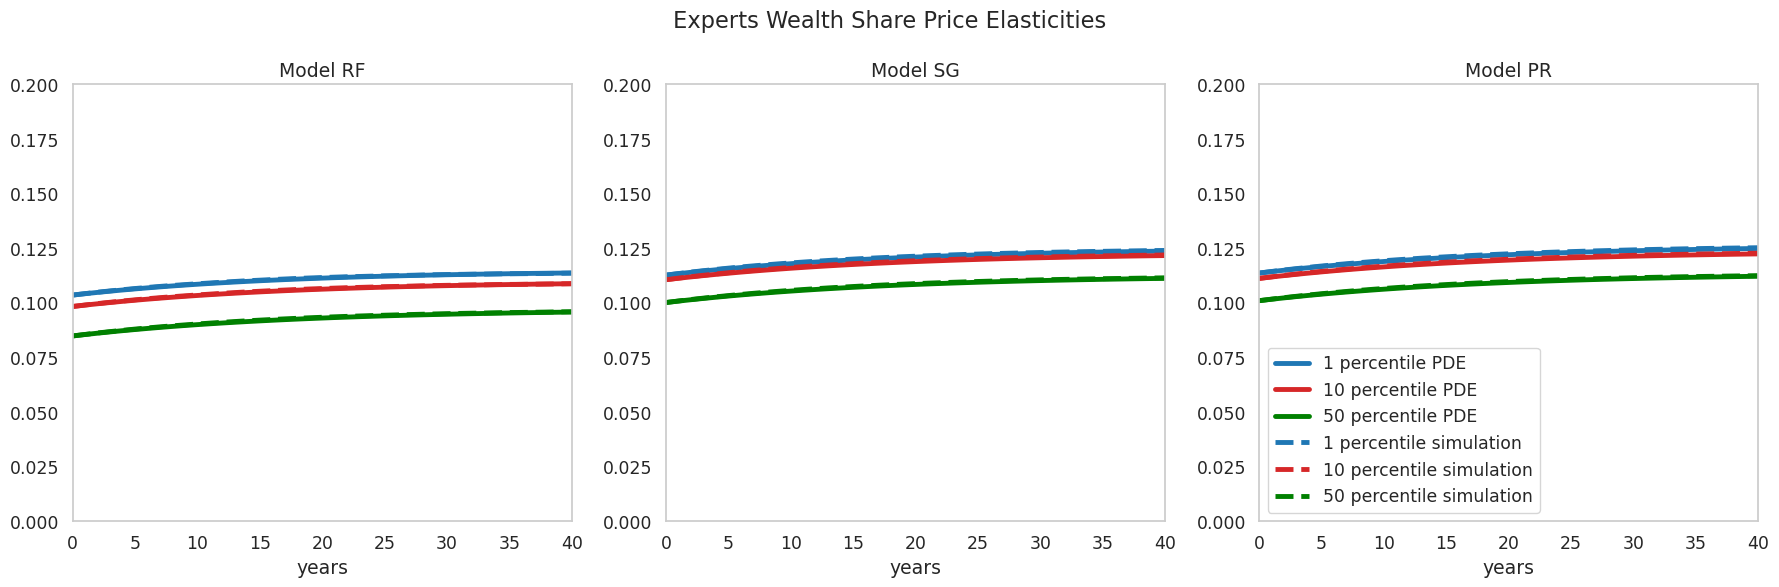

In [5]:
fig, axes = plt.subplots(1,3, figsize=(18, 6))
sns.lineplot(modelRF_lower['elasticity_logw']['price_elasticity'].item().firstType[0,0,:], ax = axes[0], color = colors[0])
sns.lineplot(modelRF_lower['elasticity_logw']['price_elasticity'].item().firstType[1,0,:], ax = axes[0], color = colors[1])
sns.lineplot(modelRF_lower['elasticity_logw']['price_elasticity'].item().firstType[2,0,:], ax = axes[0], color = colors[2])

sns.lineplot(modelRF_lower['elasticities_W_percentile_005']['price_elasticity'], ax = axes[0],color = colors[0],ls = '--')
sns.lineplot(modelRF_lower['elasticities_W_percentile_01']['price_elasticity'], ax = axes[0],color = colors[1],ls = '--')
sns.lineplot(modelRF_lower['elasticities_W_percentile_05']['price_elasticity'], ax = axes[0],color = colors[2],ls = '--')
axes[0].set_title(r'Model RF')

sns.lineplot(modelSG_lower['elasticity_logw']['price_elasticity'].item().firstType[0,0,:], ax = axes[1],color = colors[0])
sns.lineplot(modelSG_lower['elasticity_logw']['price_elasticity'].item().firstType[1,0,:], ax = axes[1],color = colors[1])
sns.lineplot(modelSG_lower['elasticity_logw']['price_elasticity'].item().firstType[2,0,:], ax = axes[1],color = colors[2])

sns.lineplot(modelSG_lower['elasticities_W_percentile_005']['price_elasticity'], ax = axes[1],color = colors[0],ls = '--')
sns.lineplot(modelSG_lower['elasticities_W_percentile_01']['price_elasticity'], ax = axes[1],color = colors[1],ls = '--')
sns.lineplot(modelSG_lower['elasticities_W_percentile_05']['price_elasticity'], ax = axes[1],color = colors[2],ls = '--')
axes[1].set_title(r'Model SG')

sns.lineplot(modelPR_lower['elasticity_logw']['price_elasticity'].item().firstType[0,0,:], ax = axes[2], label = '1 percentile PDE',color = colors[0],ls = '-')
sns.lineplot(modelPR_lower['elasticity_logw']['price_elasticity'].item().firstType[1,0,:], ax = axes[2], label = '10 percentile PDE',color = colors[1],ls = '-')
sns.lineplot(modelPR_lower['elasticity_logw']['price_elasticity'].item().firstType[2,0,:], ax = axes[2], label = '50 percentile PDE',color = colors[2],ls = '-')

sns.lineplot(modelPR_lower['elasticities_W_percentile_005']['price_elasticity'], ax = axes[2],color = colors[0], label = '1 percentile simulation',ls = '--')
sns.lineplot(modelPR_lower['elasticities_W_percentile_01']['price_elasticity'], ax = axes[2],color = colors[1], label = '10 percentile simulation',ls = '--')
sns.lineplot(modelPR_lower['elasticities_W_percentile_05']['price_elasticity'], ax = axes[2],color = colors[2], label = '50 percentile simulation',ls = '--')
axes[2].set_title(r'Model PR')

for ax in axes.flatten():
    ax.set_xlim(0,40)
    ax.grid(False)
    ax.set_ylim([0,0.2])
    ax.set_xlabel('years')
plt.suptitle('Experts Wealth Share Price Elasticities')  

plt.subplots_adjust(wspace=0.3, hspace=0.25)
plt.tight_layout()
plt.show()

# Model RF Experts Capital Risk Price

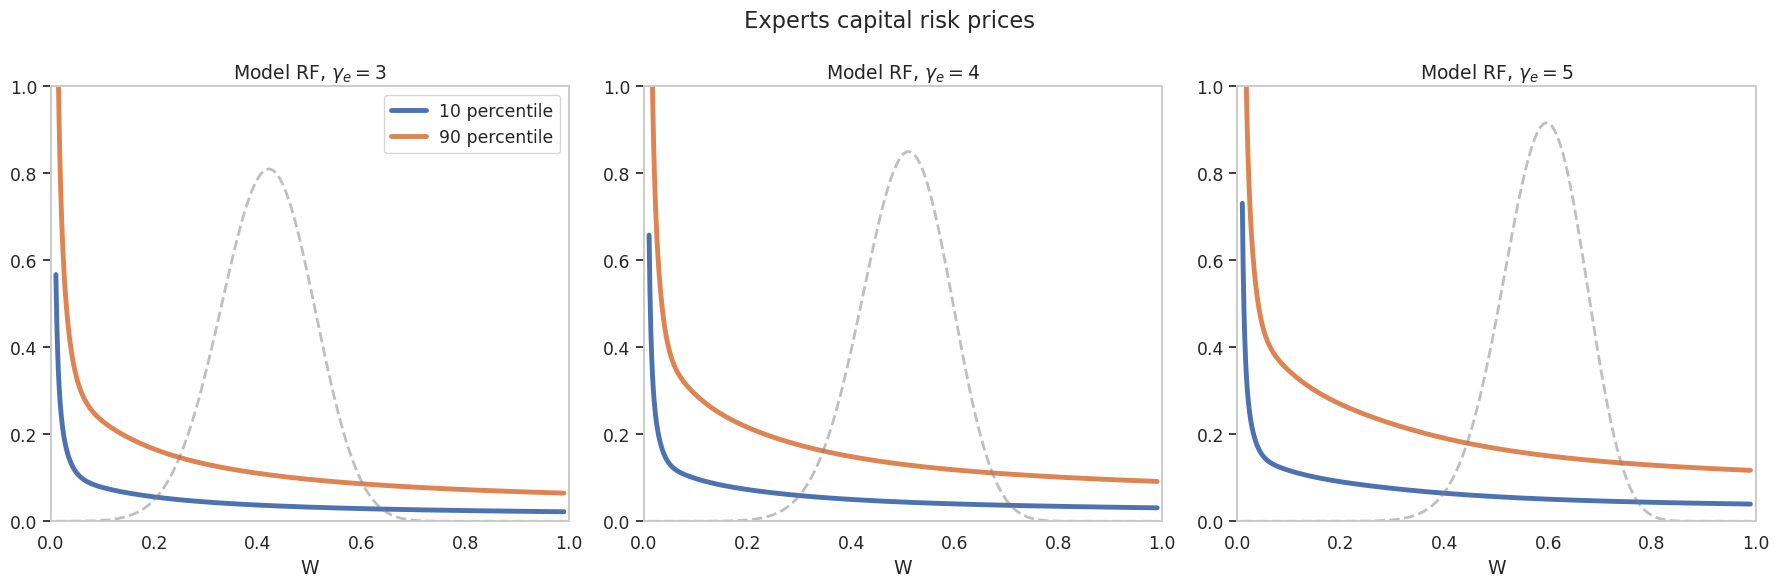

In [6]:
fig, axes = plt.subplots(1,3, figsize=(18, 6))
W_dense = np.unique(modelRF_lower['eva_V_10']['W'])
W_sparse = np.unique(modelRF_lower['W'].values)
sns.lineplot(x = W_dense, y = modelRF_lower_gammae_3['eva_V_10']['PiE_NN'][:,0], ax = axes[0], label = '10 percentile')
sns.lineplot(x = W_dense, y = modelRF_lower_gammae_3['eva_V_90']['PiE_NN'][:,0], ax = axes[0], label = '90 percentile')
axes[0].legend()
ax2 = axes[0].twinx()
sns.lineplot(x = W_sparse, y = modelRF_lower_gammae_3['dentW'].values, ax = ax2, ls='--', color='grey',lw=2.0, alpha=0.5)
ax2.grid(False)
ax2.set_yticks([])
ax2.set_ylim([0,0.03])
axes[0].set_title(r'Model RF, $\gamma_e = 3$')

sns.lineplot(x = W_dense, y = modelRF_lower['eva_V_10']['PiE_NN'][:,0], ax = axes[1])
sns.lineplot(x = W_dense, y = modelRF_lower['eva_V_90']['PiE_NN'][:,0], ax = axes[1])
ax2 = axes[1].twinx()
sns.lineplot(x = W_sparse, y = modelRF_lower['dentW'].values, ax = ax2, ls='--', color='grey',lw=2.0, alpha=0.5)
ax2.grid(False)
ax2.set_yticks([])
ax2.set_ylim([0,0.03])
axes[1].set_title(r'Model RF, $\gamma_e = 4$')

sns.lineplot(x = W_dense, y = modelRF_lower_gammae_5['eva_V_10']['PiE_NN'][:,0], ax = axes[2])
sns.lineplot(x = W_dense, y = modelRF_lower_gammae_5['eva_V_90']['PiE_NN'][:,0], ax = axes[2])
ax2 = axes[2].twinx()
sns.lineplot(x = W_sparse, y = modelRF_lower_gammae_5['dentW'].values, ax = ax2, ls='--', color='grey',lw=2.0, alpha=0.5)
ax2.grid(False)
ax2.set_yticks([])
ax2.set_ylim([0,0.03])
axes[2].set_title(r'Model RF, $\gamma_e = 5$')

for ax in axes.flatten():
    ax.set_xlim(0,1.0)
    ax.grid(False)
    ax.set_ylim([0.0,1.0])
    ax.set_xlabel('W')
plt.suptitle('Experts capital risk prices')  

plt.subplots_adjust(wspace=0.3, hspace=0.25)
plt.tight_layout()
plt.show()

# Model SG Experts Capital Risk Price

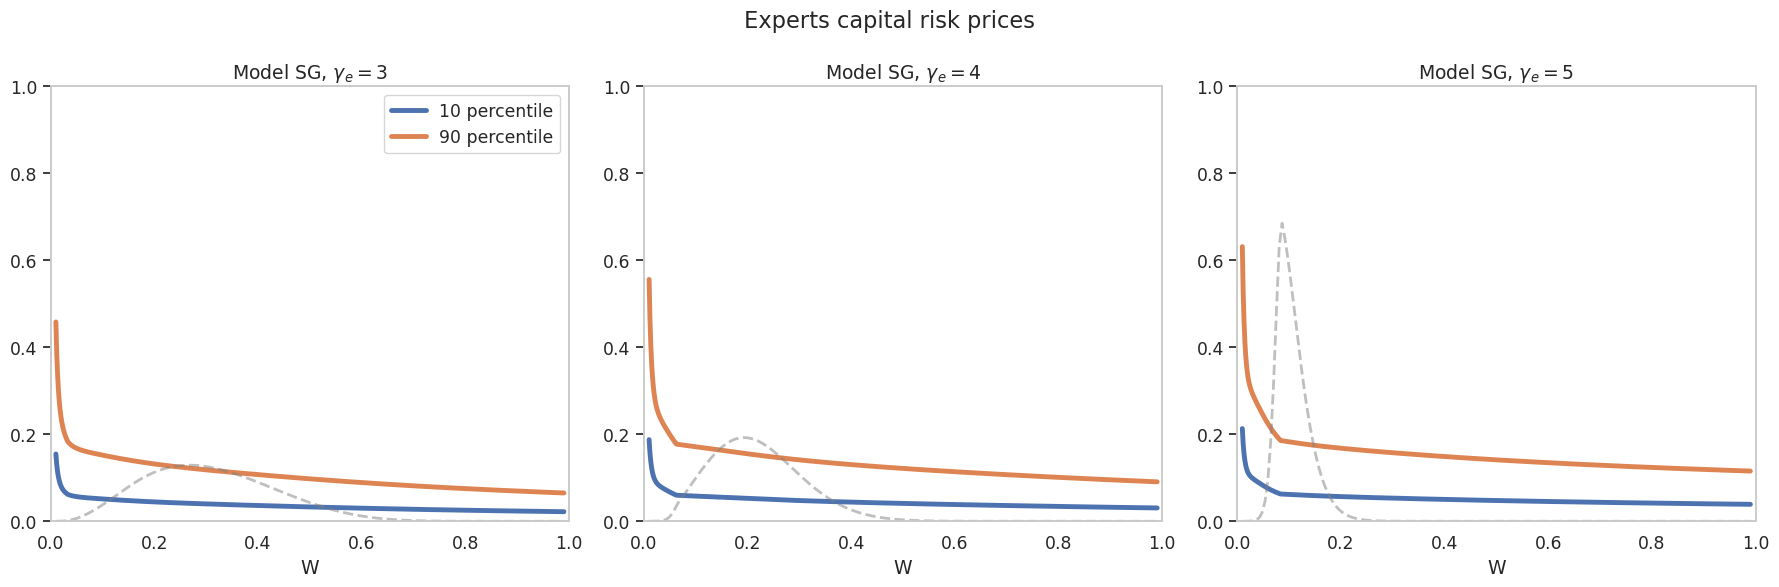

In [7]:
fig, axes = plt.subplots(1,3, figsize=(18, 6))
W_dense = np.unique(modelSG_lower['eva_V_10']['W'])
W_sparse = np.unique(modelSG_lower['W'].values)
sns.lineplot(x = W_dense, y = modelSG_lower_gammae_3['eva_V_10']['PiE_NN'][:,0], ax = axes[0], label = '10 percentile')
sns.lineplot(x = W_dense, y = modelSG_lower_gammae_3['eva_V_90']['PiE_NN'][:,0], ax = axes[0], label = '90 percentile')
axes[0].legend()    
ax2 = axes[0].twinx()
sns.lineplot(x = W_sparse, y = modelSG_lower_gammae_3['dentW'].values, ax = ax2, ls='--', color='grey',lw=2.0, alpha=0.5)
ax2.grid(False)
ax2.set_yticks([])
ax2.set_ylim([0,0.13])
axes[0].set_title(r'Model SG, $\gamma_e = 3$')

sns.lineplot(x = W_dense, y = modelSG_lower['eva_V_10']['PiE_NN'][:,0], ax = axes[1])
sns.lineplot(x = W_dense, y = modelSG_lower['eva_V_90']['PiE_NN'][:,0], ax = axes[1])
ax2 = axes[1].twinx()
sns.lineplot(x = W_sparse, y = modelSG_lower['dentW'].values, ax = ax2, ls='--', color='grey',lw=2.0, alpha=0.5)
ax2.grid(False)
ax2.set_yticks([])
ax2.set_ylim([0,0.13])
axes[1].set_title(r'Model SG, $\gamma_e = 4$')

sns.lineplot(x = W_dense, y = modelSG_lower_gammae_5['eva_V_10']['PiE_NN'][:,0], ax = axes[2])
sns.lineplot(x = W_dense, y = modelSG_lower_gammae_5['eva_V_90']['PiE_NN'][:,0], ax = axes[2])
ax2 = axes[2].twinx()
sns.lineplot(x = W_sparse, y = modelSG_lower_gammae_5['dentW'].values, ax = ax2, ls='--', color='grey',lw=2.0, alpha=0.5)
ax2.grid(False)
ax2.set_yticks([])
ax2.set_ylim([0,0.13])
axes[2].set_title(r'Model SG, $\gamma_e = 5$')

for ax in axes.flatten():
    ax.set_xlim(0,1.0)
    ax.grid(False)
    ax.set_ylim([0.0,1.0])
    ax.set_xlabel('W')
plt.suptitle('Experts capital risk prices')  

plt.subplots_adjust(wspace=0.3, hspace=0.25)
plt.tight_layout()
plt.show()

# Model SG Experts Equity Retention

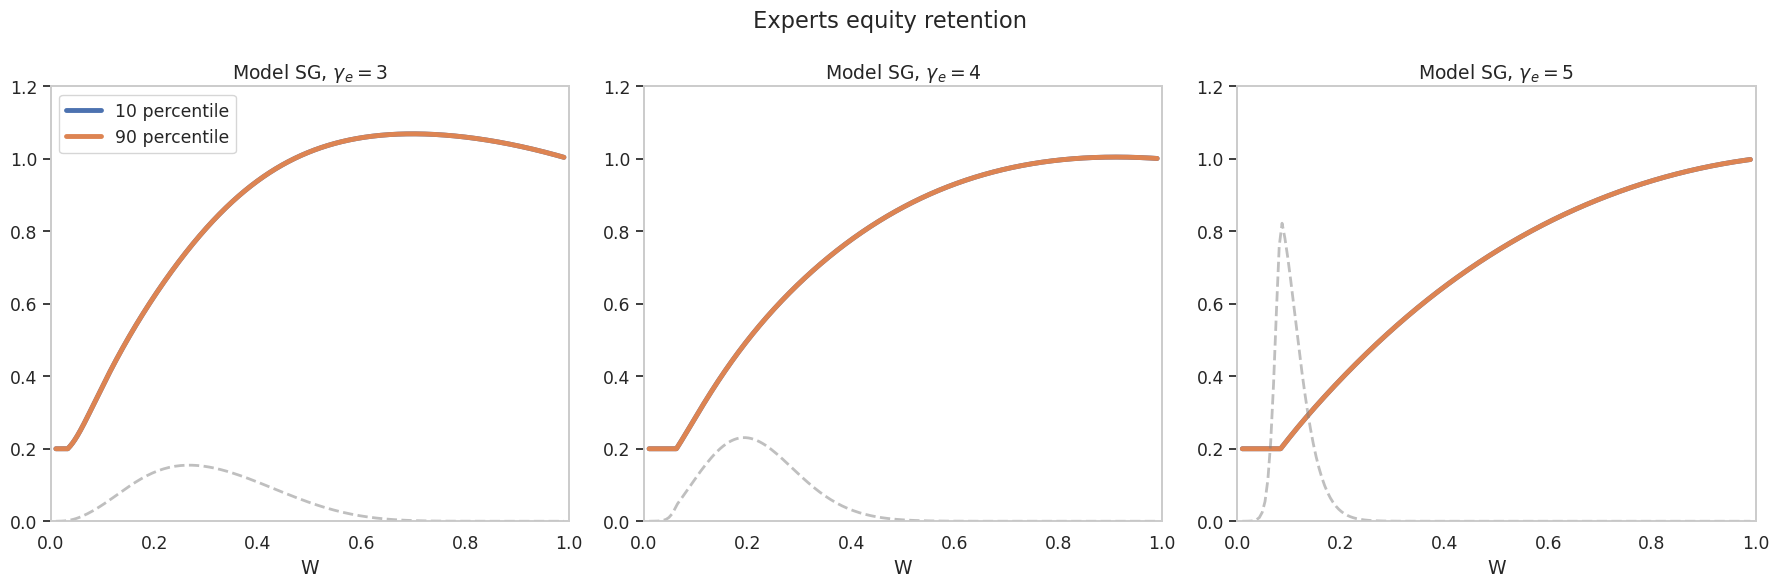

In [8]:
fig, axes = plt.subplots(1,3, figsize=(18, 6))
W_dense = np.unique(modelSG_lower['eva_V_10']['W'])
W_sparse = np.unique(modelSG_lower['W'].values)
sns.lineplot(x = W_dense, y = modelSG_lower_gammae_3['eva_V_10']['chi_NN'][:,0], ax = axes[0], label = '10 percentile')
sns.lineplot(x = W_dense, y = modelSG_lower_gammae_3['eva_V_90']['chi_NN'][:,0], ax = axes[0], label = '90 percentile')
ax2 = axes[0].twinx()
sns.lineplot(x = W_sparse, y = modelSG_lower_gammae_3['dentW'].values, ax = ax2, ls='--', color='grey',lw=2.0, alpha=0.5)
ax2.grid(False)
ax2.set_yticks([])
ax2.set_ylim([0,0.13])
axes[0].set_title(r'Model SG, $\gamma_e = 3$')

sns.lineplot(x = W_dense, y = modelSG_lower['eva_V_10']['chi_NN'][:,0], ax = axes[1])
sns.lineplot(x = W_dense, y = modelSG_lower['eva_V_90']['chi_NN'][:,0], ax = axes[1])
ax2 = axes[1].twinx()
sns.lineplot(x = W_sparse, y = modelSG_lower['dentW'].values, ax = ax2, ls='--', color='grey',lw=2.0, alpha=0.5)
ax2.grid(False)
ax2.set_yticks([])
ax2.set_ylim([0,0.13])
axes[1].set_title(r'Model SG, $\gamma_e = 4$')

sns.lineplot(x = W_dense, y = modelSG_lower_gammae_5['eva_V_10']['chi_NN'][:,0], ax = axes[2])
sns.lineplot(x = W_dense, y = modelSG_lower_gammae_5['eva_V_90']['chi_NN'][:,0], ax = axes[2])
ax2 = axes[2].twinx()
sns.lineplot(x = W_sparse, y = modelSG_lower_gammae_5['dentW'].values, ax = ax2, ls='--', color='grey',lw=2.0, alpha=0.5)
ax2.grid(False)
ax2.set_yticks([])
ax2.set_ylim([0,0.13])
axes[2].set_title(r'Model SG, $\gamma_e = 5$')

for ax in axes.flatten():
    ax.set_xlim(0,1.0)
    ax.grid(False)
    ax.set_ylim([0.0,1.2])
    ax.set_xlabel('W')
plt.suptitle('Experts equity retention')  

plt.subplots_adjust(wspace=0.3, hspace=0.25)
plt.tight_layout()
plt.show()

# Model PR Experts Capital Risk Price

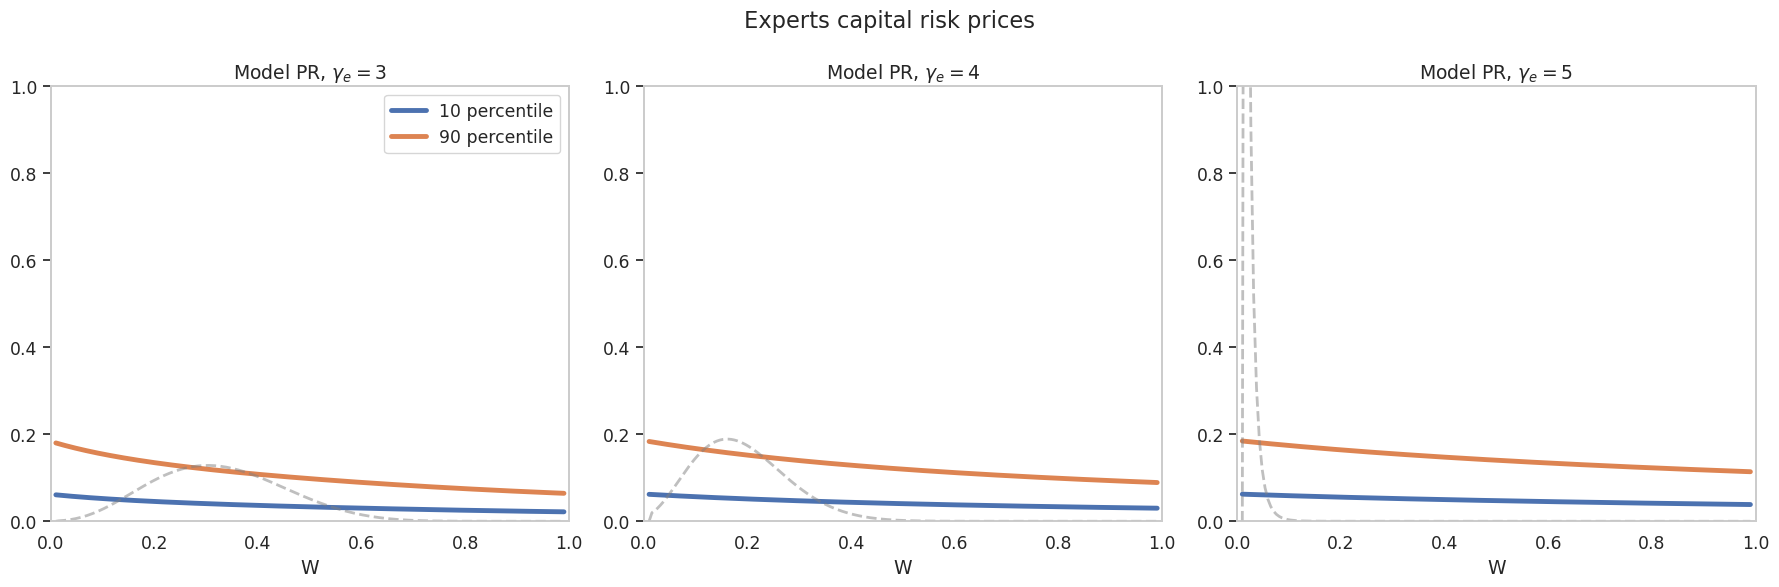

In [9]:
fig, axes = plt.subplots(1,3, figsize=(18, 6))
W_dense = np.unique(modelPR_lower['eva_V_10']['W'])
W_sparse = np.unique(modelPR_lower['W'].values)
sns.lineplot(x = W_dense, y = modelPR_lower_gammae_3['eva_V_10']['PiE_NN'][:,0], ax = axes[0], label = '10 percentile')
sns.lineplot(x = W_dense, y = modelPR_lower_gammae_3['eva_V_90']['PiE_NN'][:,0], ax = axes[0], label = '90 percentile')
ax2 = axes[0].twinx()
sns.lineplot(x = W_sparse, y = modelPR_lower_gammae_3['dentW'].values, ax = ax2, ls='--', color='grey',lw=2.0, alpha=0.5)
ax2.grid(False)
ax2.set_yticks([])
ax2.set_ylim([0,0.13])
axes[0].set_title(r'Model PR, $\gamma_e = 3$')

sns.lineplot(x = W_dense, y = modelPR_lower['eva_V_10']['PiE_NN'][:,0], ax = axes[1])
sns.lineplot(x = W_dense, y = modelPR_lower['eva_V_90']['PiE_NN'][:,0], ax = axes[1])
ax2 = axes[1].twinx()
sns.lineplot(x = W_sparse, y = modelPR_lower['dentW'].values, ax = ax2, ls='--', color='grey',lw=2.0, alpha=0.5)
ax2.grid(False)
ax2.set_yticks([])
ax2.set_ylim([0,0.13])
axes[1].set_title(r'Model PR, $\gamma_e = 4$')

sns.lineplot(x = W_dense, y = modelPR_lower_gammae_5['eva_V_10']['PiE_NN'][:,0], ax = axes[2])
sns.lineplot(x = W_dense, y = modelPR_lower_gammae_5['eva_V_90']['PiE_NN'][:,0], ax = axes[2])
ax2 = axes[2].twinx()
sns.lineplot(x = W_sparse, y = modelPR_lower_gammae_5['dentW'].values, ax = ax2, ls='--', color='grey',lw=2.0, alpha=0.5)
ax2.grid(False)
ax2.set_yticks([])
ax2.set_ylim([0,0.13])
axes[2].set_title(r'Model PR, $\gamma_e = 5$')

for ax in axes.flatten():
    ax.set_xlim(0,1.0)
    ax.grid(False)
    ax.set_ylim([0.0,1.0])
    ax.set_xlabel('W')
plt.suptitle('Experts capital risk prices')  

plt.subplots_adjust(wspace=0.3, hspace=0.25)
plt.tight_layout()
plt.show()

# Model PR Experts Equity Retention

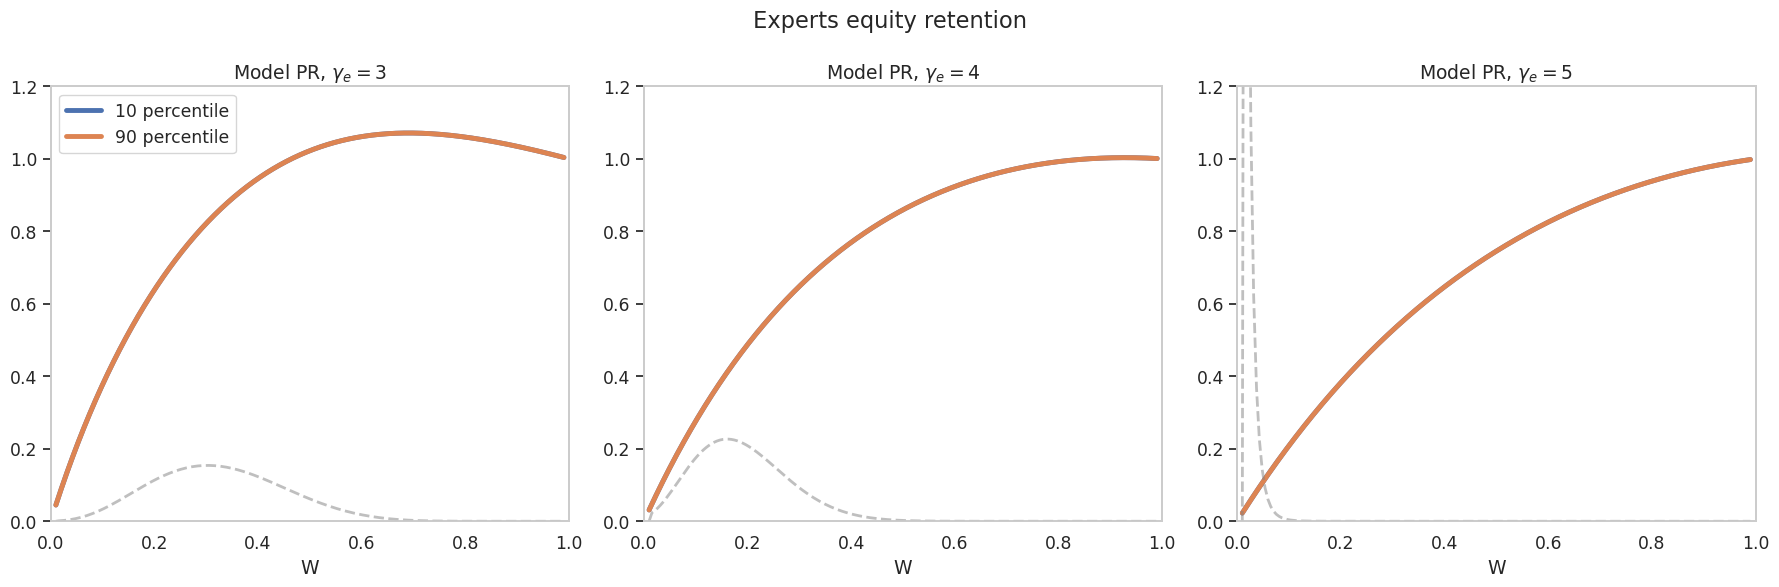

In [10]:
fig, axes = plt.subplots(1,3, figsize=(18, 6))
W_dense = np.unique(modelPR_lower['eva_V_10']['W'])
W_sparse = np.unique(modelPR_lower['W'].values)
sns.lineplot(x = W_dense, y = modelPR_lower_gammae_3['eva_V_10']['chi_NN'][:,0], ax = axes[0], label = '10 percentile')
sns.lineplot(x = W_dense, y = modelPR_lower_gammae_3['eva_V_90']['chi_NN'][:,0], ax = axes[0], label = '90 percentile')
axes[0].legend()
ax2 = axes[0].twinx()
sns.lineplot(x = W_sparse, y = modelPR_lower_gammae_3['dentW'].values, ax = ax2, ls='--', color='grey',lw=2.0, alpha=0.5)
ax2.grid(False)
ax2.set_yticks([])
ax2.set_ylim([0,0.13])
axes[0].set_title(r'Model PR, $\gamma_e = 3$')

sns.lineplot(x = W_dense, y = modelPR_lower['eva_V_10']['chi_NN'][:,0], ax = axes[1])
sns.lineplot(x = W_dense, y = modelPR_lower['eva_V_90']['chi_NN'][:,0], ax = axes[1])
ax2 = axes[1].twinx()
sns.lineplot(x = W_sparse, y = modelPR_lower['dentW'].values, ax = ax2, ls='--', color='grey',lw=2.0, alpha=0.5)
ax2.grid(False)
ax2.set_yticks([])
ax2.set_ylim([0,0.13])
axes[1].set_title(r'Model PR, $\gamma_e = 4$')

sns.lineplot(x = W_dense, y = modelPR_lower_gammae_5['eva_V_10']['chi_NN'][:,0], ax = axes[2])
sns.lineplot(x = W_dense, y = modelPR_lower_gammae_5['eva_V_90']['chi_NN'][:,0], ax = axes[2])
ax2 = axes[2].twinx()
sns.lineplot(x = W_sparse, y = modelPR_lower_gammae_5['dentW'].values, ax = ax2, ls='--', color='grey',lw=2.0, alpha=0.5)
ax2.grid(False)
ax2.set_yticks([])
ax2.set_ylim([0,0.13])
axes[2].set_title(r'Model PR, $\gamma_e = 5$')

for ax in axes.flatten():
    ax.set_xlim(0,1.0)
    ax.grid(False)
    ax.set_ylim([0.0,1.2])
    ax.set_xlabel('W')
plt.suptitle('Experts equity retention')  

plt.subplots_adjust(wspace=0.3, hspace=0.25)
plt.tight_layout()
plt.show()

# Uncertainty Price Elasticities

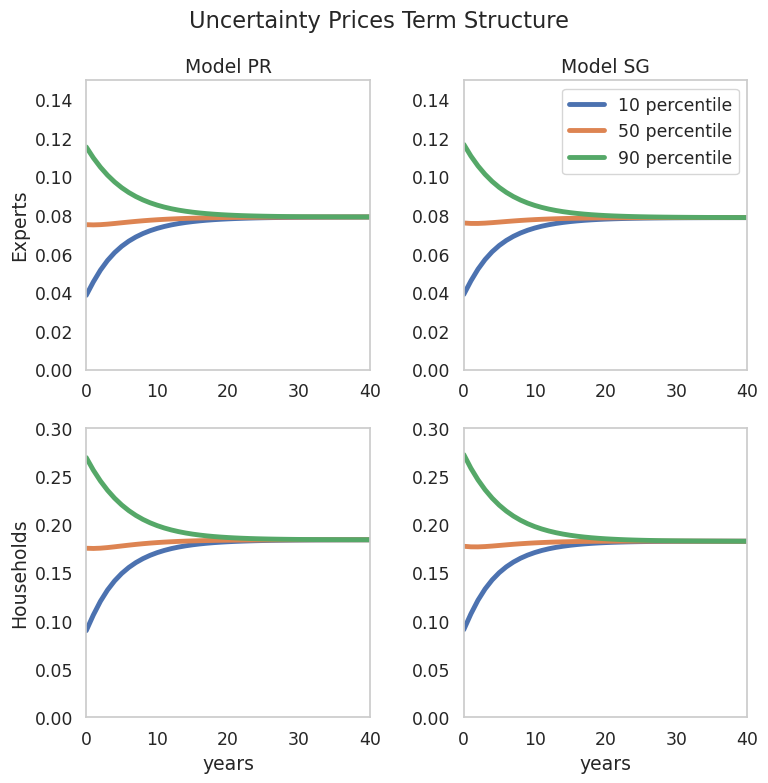

In [11]:
fig, axes = plt.subplots(2,2, figsize=(8, 8))
sns.lineplot(modelPR_upper['uncertaintye_priceelas']['price_elasticity'].item().secondType[0,1,:], ax = axes[0,0])
sns.lineplot(modelPR_upper['uncertaintye_priceelas']['price_elasticity'].item().secondType[1,1,:], ax = axes[0,0])
sns.lineplot(modelPR_upper['uncertaintye_priceelas']['price_elasticity'].item().secondType[2,1,:], ax = axes[0,0])
axes[0,0].set_title("Model PR")
axes[0,0].set_ylabel("Experts")
axes[0,0].set_ylim([0,0.15])

sns.lineplot(modelSG_upper['uncertaintye_priceelas']['price_elasticity'].item().secondType[0,1,:], ax = axes[0,1], label = '10 percentile')
sns.lineplot(modelSG_upper['uncertaintye_priceelas']['price_elasticity'].item().secondType[1,1,:], ax = axes[0,1], label = '50 percentile')
sns.lineplot(modelSG_upper['uncertaintye_priceelas']['price_elasticity'].item().secondType[2,1,:], ax = axes[0,1], label = '90 percentile')
axes[0,1].set_title("Model SG")
axes[0,1].set_ylim([0,0.15])

sns.lineplot(modelPR_upper['uncertaintyh_priceelas']['price_elasticity'].item().secondType[0,1,:], ax = axes[1,0])
sns.lineplot(modelPR_upper['uncertaintyh_priceelas']['price_elasticity'].item().secondType[1,1,:], ax = axes[1,0])
sns.lineplot(modelPR_upper['uncertaintyh_priceelas']['price_elasticity'].item().secondType[2,1,:], ax = axes[1,0])
axes[1,0].set_ylabel("Households")
axes[1,0].set_xlabel("years")
axes[1,0].set_ylim([0,0.3])

sns.lineplot(modelSG_upper['uncertaintyh_priceelas']['price_elasticity'].item().secondType[0,1,:], ax = axes[1,1])
sns.lineplot(modelSG_upper['uncertaintyh_priceelas']['price_elasticity'].item().secondType[1,1,:], ax = axes[1,1])
sns.lineplot(modelSG_upper['uncertaintyh_priceelas']['price_elasticity'].item().secondType[2,1,:], ax = axes[1,1])
axes[1,1].set_xlabel("years")
axes[1,1].set_ylim([0,0.3])

for ax in axes.flatten():
    ax.set_xlim(0,40)
    ax.grid(False)

plt.suptitle('Uncertainty Prices Term Structure')
plt.subplots_adjust(wspace=0.3, hspace=0.25)
plt.tight_layout()
plt.show()
